<a href="https://colab.research.google.com/github/Aikhusy/Random/blob/main/ULARNAGA/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)


c:\Program Files\Python310\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

1. **Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset
MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!**

In [7]:
label_counts = np.bincount(mnist.target.astype(int))

c:\Program Files\Python310\lib\site-packages\pandas\core\arrays\categorical.py:528: RuntimeWarning: invalid value encountered in cast
  fill_value = lib.item_from_zerodim(np.array(np.nan).astype(dtype))


In [8]:
for index, value in enumerate(label_counts):
    print(f'nilai {index} = {value}')

nilai 0 = 6903
nilai 1 = 7877
nilai 2 = 6990
nilai 3 = 7141
nilai 4 = 6824
nilai 5 = 6313
nilai 6 = 6876
nilai 7 = 7293
nilai 8 = 6825
nilai 9 = 6958


**2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat
menggunakan referensi dari Job Sheet 03.**

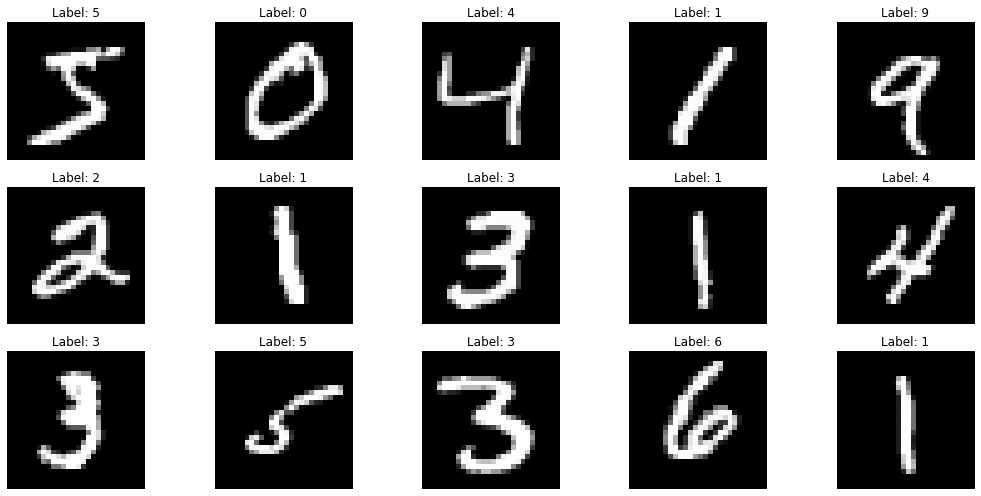

In [9]:
fig, axes = plt.subplots(3, 5, figsize=(15, 7))
for i, ax in enumerate(axes.flat):
    ax.imshow(mnist.data.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {mnist.target[i]}")
    ax.axis('off')
plt.tight_layout()

**3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai
fitur.
Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda
diperbolehkan melakukan ekspolarasi pada proses ini**

In [10]:
X=mnist.data.astype('float64')
y = mnist.target

In [11]:
print(y)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [12]:
from sklearn.decomposition import PCA

In [14]:
n_components = 50
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

In [15]:
print(X_pca)

[[ 122.25525533 -316.23384392  -51.13183086 ...  -92.82779302
    55.28326804   97.87992963]
 [1010.49400346 -289.96362059  576.1207452  ... -162.57810708
   138.83785068  261.76343784]
 [ -58.99594719  393.69744499 -161.99818409 ...   42.56278751
  -149.31513965    3.10952356]
 ...
 [-271.50701323  590.0785001   341.36886918 ...    7.13447362
  -110.38258216  -31.07534268]
 [-310.22482291 -116.72715081  635.71999693 ...  -15.69271013
   -84.36072912 -180.4889733 ]
 [1058.86212574  -83.39253843  731.34218395 ...  -78.39889374
    95.8349178   -52.4469453 ]]
